<a href="https://colab.research.google.com/github/Maria-arroyo18/Integracion-de-datos2025/blob/main/Reto_Parcial_Maria_Fernanda_Arroyo_Berrocal.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Caso de Estudio**

Una entidad del sector salud en Colombia, quiere llevar a cabo un estudio
sobre los hábitos de las personas, y que las pueden llevar a un ataque

En este ejercicio se llevará a cabo un proceso de integración de datos utilizando la teoría de la credibilidad y el método de aceptación y rechazo. Para ello, primero se identifica cuál de las variables numéricas presenta mayor correlación con el riesgo de ataque cardíaco y se toma como referencia para el análisis. Posteriormente, se determina qué países de América presentan mayor credibilidad con respecto a Colombia y, a partir de estos, se realiza la integración de los datos seleccionados. Finalmente, se calculan y comparan las medidas estadísticas de tendencia central y dispersión antes y después de la integración, verificando además que el tamaño de la muestra cumpla con el nivel de confiabilidad del 99.9%.

0. Cargamos las librerías necesarias

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis

1. Hacemos la conexion con Drive y visualizamps los datos

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
nxl="/content/drive/MyDrive/Integracion de datos 2025-2/heart_attack_prediction_dataset.csv"
df = pd.read_csv(nxl)
display(df)

,Patient ID,Age,Sex,Cholesterol,Blood Pressure,Heart Rate,Diabetes,Family History,Smoking,Obesity,...,Sedentary Hours Per Day,Income,BMI,Triglycerides,Physical Activity Days Per Week,Sleep Hours Per Day,Country,Continent,Hemisphere,Heart Attack Risk
0,BMW7812,67,Male,208,158/88,72,0,0,1,0,...,6.615001,261404,31.251233,286,0,6,Argentina,South America,Southern Hemisphere,0
1,CZE1114,21,Male,389,165/93,98,1,1,1,1,...,4.963459,285768,27.194973,235,1,7,Canada,North America,Northern Hemisphere,0
2,BNI9906,21,Female,324,174/99,72,1,0,0,0,...,9.463426,235282,28.176571,587,4,4,France,Europe,Northern Hemisphere,0
3,JLN3497,84,Male,383,163/100,73,1,1,1,0,...,7.648981,125640,36.464704,378,3,4,Canada,North America,Northern Hemisphere,0
4,GFO8847,66,Male,318,91/88,93,1,1,1,1,...,1.514821,160555,21.809144,231,1,5,Thailand,Asia,Northern Hemisphere,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8758,MSV9918,60,Male,121,94/76,61,1,1,1,0,...,10.806373,235420,19.655895,67,7,7,Thailand,Asia,Northern Hemisphere,0
8759,QSV6764,28,Female,120,157/102,73,1,0,0,1,...,3.833038,217881,23.993866,617,4,9,Canada,North America,Northern Hemisphere,0
8760,XKA5925,47,Male,250,161/75,105,0,1,1,1,...,2.375214,36998,35.406146,527,4,4,Brazil,South America,Southern Hemisphere,1
8761,EPE6801,36,Male,178,119/67,60,1,0,1,0,...,0.029104,209943,27.294020,114,2,8,Brazil,South America,Southern Hemisphere,0


In [4]:
df.columns

Index(['Patient ID', 'Age', 'Sex', 'Cholesterol', 'Blood Pressure',
       'Heart Rate', 'Diabetes', 'Family History', 'Smoking', 'Obesity',
       'Alcohol Consumption', 'Exercise Hours Per Week', 'Diet',
       'Previous Heart Problems', 'Medication Use', 'Stress Level',
       'Sedentary Hours Per Day', 'Income', 'BMI', 'Triglycerides',
       'Physical Activity Days Per Week', 'Sleep Hours Per Day', 'Country',
       'Continent', 'Hemisphere', 'Heart Attack Risk'],
      dtype='object')

2.Vemos que variable tiene mayor correlación con la variable de referencia "Heart Attack Risk"

In [10]:
df1=df.corr(numeric_only=True)

<Axes: >

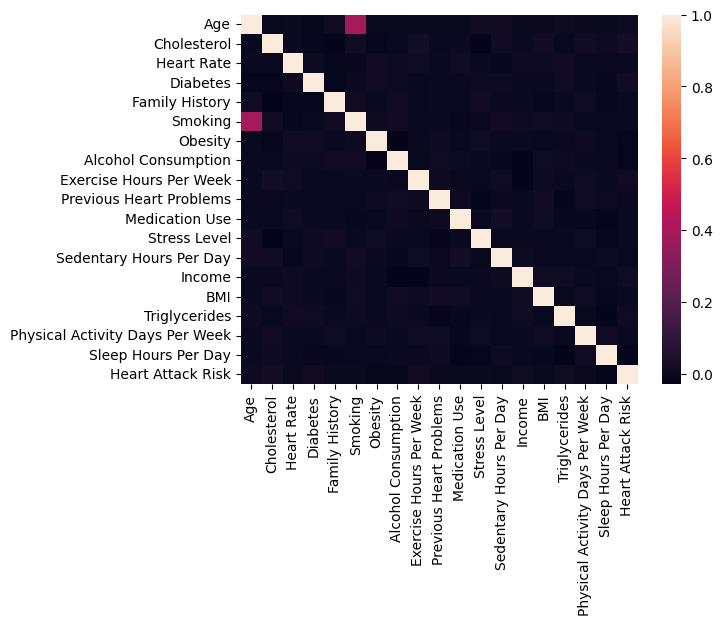

In [12]:
df1 = df.select_dtypes(include=np.number)

sns.heatmap(df1.corr())

Teniendo en cuenta el mapa de calor y la función, la variable que presenta la mayor correlación con respecto a Heart Attack Risk es Cholesterol, por lo cual se selecciona como la variable de referencia para llevar a cabo el proceso de integración de datos mediante la teoría de la credibilidad y el método de aceptación y rechazo.

In [19]:
AMERICAS = {
    'Canada','United States','USA','Mexico','Guatemala','Belize','El Salvador','Honduras','Nicaragua',
    'Costa Rica','Panama','Cuba','Jamaica','Haiti','Dominican Republic','Puerto Rico','Trinidad and Tobago',
    'Bahamas','Barbados','Colombia','Venezuela','Ecuador','Peru','Bolivia','Chile','Argentina','Paraguay',
    'Uruguay','Brazil','Guyana','Suriname'
}

# Filtrar solo América y limpiar nombre de países
dfA = df[df['Country'].astype(str).str.strip().str.title().isin({p.title() for p in AMERICAS})].copy()

print("Países en América (en datos):", sorted(dfA['Country'].astype(str).str.title().unique()))

# Extraer los datos de Colombia para la variable de referencia
mask_col = dfA['Country'].astype(str).str.title() == 'Colombia'
XDBo = dfA.loc[mask_col, ['Cholesterol']].dropna()
XDo  = np.array(XDBo['Cholesterol'], dtype=float)

print("XDo (Colombia) n =", len(XDo))

if XDo.size == 0:
    raise SystemExit("No hay datos de Colombia para la variable de referencia.")

Países en América (en datos): ['Argentina', 'Brazil', 'Canada', 'Colombia', 'United States']
XDo (Colombia) n = 429


En la base de datos filtrada por países de América se encuentran registros correspondientes a Argentina, Brazil, Canada, Colombia y United States. Dentro de este conjunto, se extraen 429 datos de Colombia para la variable de referencia seleccionada (Cholesterol), los cuales constituyen la base inicial (XDo) sobre la cual se aplicarán posteriormente los métodos de credibilidad y de aceptación y rechazo al comparar con los demás países.

3. Aplicamos el modelo de credibilidad

In [20]:
def credibilidad(XDo,XDe):

  #1. Se calcula el valor esperado de la varianza
  NDo=len(XDo); NDe=len(XDe)
  EPV=(NDo*np.var(XDo)+NDe*np.var(XDe))/(NDo+NDe) #Valor esperado de la varianza

  #2. Valor Hipotetico de la Media (Es la media compartida)
  uh=(NDo*np.mean(XDo)+NDe*np.mean(XDe))/(NDo+NDe)

  #3. Varianza Hipótetica de la Media
  VHM=((NDo*np.mean(XDo)**2+NDe*np.mean(XDe)**2)/(NDo+NDe))-uh**2

  #4. Factor de Credibilidad
  fc=(EPV/VHM)
  #print("El factor de credibilidad es:",fc)

  #5. La Credibilidad es
  Cr=NDo/(NDo+fc)
  print("La credibilidad del país es:",(Cr)*100)

  return NDo, NDe,fc,Cr

In [21]:
filas = np.where(df.iloc[:,22]=="Colombia")[0]
XDo = df1.iloc[filas,1]

arrays=[]

for k in ["Argentina", "Brazil", "Canada", "Colombia", "United States"]:
  filas =np.where(df.iloc[:,22]==k)[0]
  arr = np.zeros((len(filas), 1))
  arr = df1.iloc[filas,1]
  XDe = arr
  arrays.append(arr)
  NDo, NDe, fc, Cr = credibilidad(XDo, XDe)
  print(f"El factor de credibilidad para {k} es: {(Cr)*100}")
  print(NDo, NDe, fc, Cr)

La credibilidad del país es: 0.16722913773939918
El factor de credibilidad para Argentina es: 0.16722913773939918
429 471 256105.24146007997 0.0016722913773939917
La credibilidad del país es: 25.150015038663497
El factor de credibilidad para Brazil es: 25.150015038663497
429 462 1276.7643875778676 0.251500150386635
La credibilidad del país es: 29.56356819249535
El factor de credibilidad para Canada es: 29.56356819249535
429 440 1022.1103572027574 0.2956356819249535
La credibilidad del país es: 0.0
El factor de credibilidad para Colombia es: 0.0
429 429 inf 0.0
La credibilidad del país es: 44.56295878659185
El factor de credibilidad para United States es: 44.56295878659185
429 420 533.6829359658183 0.4456295878659185


/tmp/ipython-input-1105971307.py:14: RuntimeWarning: divide by zero encountered in scalar divide
  fc=(EPV/VHM)


4. Metodo de aceptación y rechazo

El coeficiente de asimetría Original: 0.028433473146044334
El coeficiente de curtosis Original: -1.1716574947470142
El numero de datos integrados para Brazil fue 220
El coeficiente de asimetría Integrados: -0.13523245600332878
El coeficiente de curtosis Integrados: -1.24942154209912


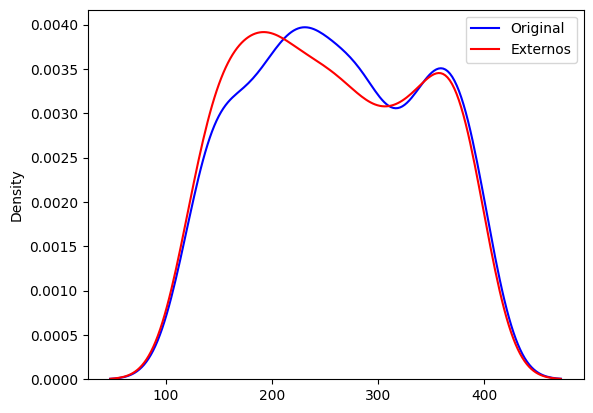

El coeficiente de asimetría Original: 0.028433473146044334
El coeficiente de curtosis Original: -1.1716574947470142
El numero de datos integrados para Canada fue 208
El coeficiente de asimetría Integrados: 0.12648165959935564
El coeficiente de curtosis Integrados: -1.20415591733207


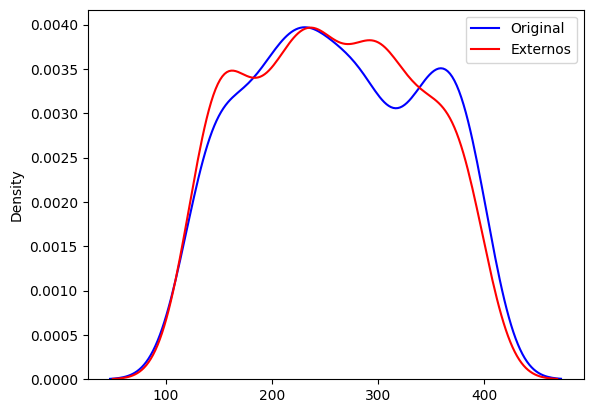

El coeficiente de asimetría Original: 0.028433473146044334
El coeficiente de curtosis Original: -1.1716574947470142
El numero de datos integrados para United States fue 202
El coeficiente de asimetría Integrados: -0.1088094305075733
El coeficiente de curtosis Integrados: -1.2425507195703187


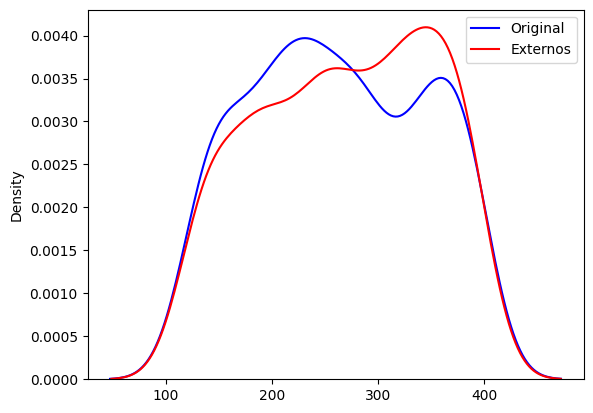

In [29]:
filas = np.where(df.iloc[:,22]=="Colombia")[0]
XDo = df1.iloc[filas,1]

arrays=[]

for k in ["Brazil", "Canada",  "United States"]:
  filas =np.where(df.iloc[:,22]==k)[0]
  arr = np.zeros((len(filas), 1))
  arr = df1.iloc[filas,1]
  XDe = arr

  XDF1=np.array(XDe);XDo=np.array(XDo)
  uo = np.mean(XDo); uf1 = np.mean(XDF1)
  sigmao = np.std(XDo); sigmaf1 = np.std(XDF1)
  print("El coeficiente de asimetría Original:", skew(XDo))
  print("El coeficiente de curtosis Original:", kurtosis(XDo))

  #Se procede con la integración de los datos externos

  XDInt = []

  for k1 in range(len(XDF1)):
    #print(XDF1[k]) #Para mirar todos los datos del F1
    x = XDF1[k1] #Dato a integrar
    VPo = np.exp(-0.5*((x-uo)/sigmao)**2)
    VPf1 = np.exp(-0.5*((x-uf1)/sigmaf1)**2)

    if VPf1<VPo:# and VPo>0.9:  #Escoger lo que tienen un valor de petenencia por encima del 90% con respecto a
                                #los datos para que no dañe los coeficientes
                                #Asegura que los datos sean confiables con respecto a los datos observados
      XDInt.append(x)

  print(f"El numero de datos integrados para {k} fue {len(XDInt)}")
  print("El coeficiente de asimetría Integrados:", skew(XDInt))
  print("El coeficiente de curtosis Integrados:", kurtosis(XDInt))

  plt.figure()
  sns.kdeplot(XDo, label = 'Original', color = 'blue')
  sns.kdeplot(XDF1, label = 'Externos', color = 'red')
  plt.legend()
  plt.show()


**Analisis**

Al analizar la matriz de correlación se determinó que la variable que mayor relación presenta con el riesgo de ataque cardíaco es Cholesterol, por esto cse seleccionó como variable de referencia para el proceso de integración. A partir del modelo de credibilidad se identificó que el país con mayor afinidad con Colombia es Estados unidos ya que tiene un 44.56%, luego le sigue Canada con 29.56% y Brazil con 25.15%, finalmente Argentina resultó con el menor valor de credibilidad, con apenas 0.16%. De esta forma, los países escogidos para realizar la integración fueron Estados Unidos y Canada, al mostrar mayor cercanía estadística con los datos colombianos.

Al aplicar el modelo de aceptación y rechazo se observó que la integración de datos introduce variaciones en los resultados de las métricas estadísticas. En particular, los coeficientes de asimetría tienden a desplazarse hacia valores negativos en los casos de Brazil y United States, mientras que con Canada se aprecia un movimiento hacia valores positivos. En todos los casos la curtosis disminuye de manera ligera respecto a la base original de Colombia, indicando distribuciones más aplanadas. Finalmente, las gráficas de densidad reflejan que, si bien los datos integrados conservan la forma general de la distribución original, se generan pequeños cambios en la altura y dispersión de los picos, lo cual confirma la compatibilidad de los datos integrados y respalda su validez para fortalecer la base de referencia.